In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Number of sampling

In [2]:
N = 10000

# Constraints

$R1$ in range $[250000, 2050000]\ {\rm \Omega}$

$R2$ in range $[6000, 32000]\ {\rm \Omega}$

$R3$ in range $[300000, 500000]\ {\rm \mu m}$

$W1$ in range $[80, 100]\ {\rm \mu m}$

$L1$ in range $[40, 80]\ {\rm \mu m}$

$W2$ in range $[480, 500]\ {\rm \mu m}$

$L2$ in range $[30, 40]\ {\rm \mu m}$

$W3$ in range $[80, 200]\ {\rm \mu m}$

$L3$ in range $[50, 150]\ {\rm \mu m}$

In [3]:
range_r1  = [250000,2050000]
range_r2  = [6000,32000]
range_r3  = [300000,500000]
range_w1  = [80,100]
range_l1  = [40,80]
range_w2  = [480,500]
range_l2  = [30,40]
range_w3  = [80,200]
range_l3  = [50,150]

In [4]:
RANGE = torch.tensor([range_r1,range_r2,range_r3,range_w1,range_l1,range_w2,range_l2,range_w3,range_l3])

In [5]:
ACT_sampling_mc =  torch.quasirandom.SobolEngine(9).draw(N)
ACT_sampling_mc = ACT_sampling_mc*(RANGE[:,1]-RANGE[:,0]) + RANGE[:,0]
ACT_sampling_mc = np.round(ACT_sampling_mc).T
ACT_sampling_mc.shape

torch.Size([9, 10000])

In [6]:
ACT_sampling_mc[3:,:] = ACT_sampling_mc[3:,:] / 1000000
ACT_sampling_mc

tensor([[2.5000e+05, 1.1500e+06, 1.6000e+06,  ..., 1.7207e+06, 1.2707e+06,
         3.7074e+05],
        [6.0000e+03, 1.9000e+04, 1.2500e+04,  ..., 2.3458e+04, 1.6958e+04,
         2.9958e+04],
        [3.0000e+05, 4.0000e+05, 3.5000e+05,  ..., 4.4654e+05, 3.9654e+05,
         4.9654e+05],
        ...,
        [3.0000e-05, 3.5000e-05, 3.2000e-05,  ..., 3.3000e-05, 3.6000e-05,
         3.1000e-05],
        [8.0000e-05, 1.4000e-04, 1.7000e-04,  ..., 1.3700e-04, 1.0700e-04,
         1.6700e-04],
        [5.0000e-05, 1.0000e-04, 1.2500e-04,  ..., 1.1100e-04, 1.3600e-04,
         8.6000e-05]])

In [7]:
np.savetxt('./data/sampling_neg.csv', ACT_sampling_mc, fmt='%f', delimiter=',')

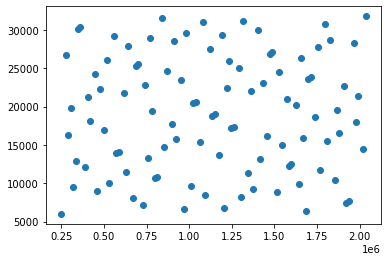

In [8]:
plt.scatter(ACT_sampling_mc[0,:100],ACT_sampling_mc[1,:100])